# **Atividade de experimentação 65**

Testando o modelo do detector de emoções

## Importando as bibliotecas

In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.15.0'

## Conectando com o Drive e acessando os arquivos

In [ ]:
# Conectando o Colab ao Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Realize o dowload da pasta Material_complementar_reconhecimento_emocoes.zip do Google Sala de Aula e transfira-a para o seu Google Drive
# Localize o caminho da pasta no menu Arquivos, no menu lateral esquerdo
path = "/content/gdrive/MyDrive/Material_complementar_reconhecimento_emocoes.zip"
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/MyDrive/Material_complementar_reconhecimento_emocoes.zip' mode='r'>>

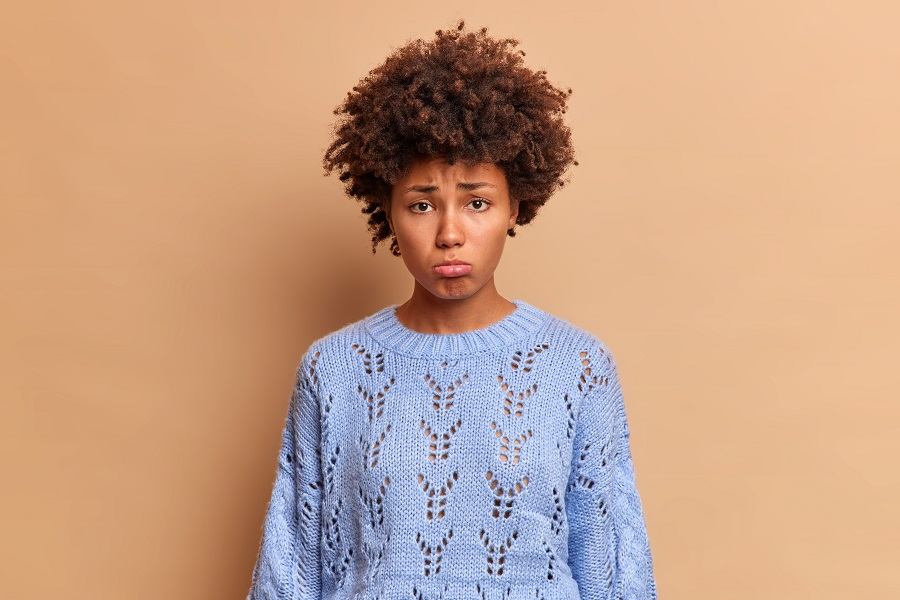

In [ ]:
# Selecione uma imagem da pasta "testes" para o reconhecimento da emoção
imagem = cv2.imread('/content/testes/mulher_triste.jpg')
cv2_imshow(imagem)

## Testando o Detector

**Carregamento dos modelos**

In [ ]:
# Utilize um haarcasdade pré treinado para o reconhecimento facial
# Utilize um modelo pré treinado para o reconhecimento das emoções
cascade_faces = "/content/haarcascade_frontalface_default.xml"
caminho_modelo = "/content/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"] # Expressões identicadas pelo modelo

**Detecção de faces**

In [ ]:
# Detecta faces na imagem selecionada
original = imagem.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20,20))

In [ ]:
# Apresentação do array representando a localização (em pixels) das faces encontradas
faces

array([[381, 149, 140, 140],
       [262, 517,  34,  34]], dtype=int32)

In [ ]:
# Quantidade de faces encontradas pelo modelo
len(faces)

2

**Extração do ROI (região de interesse)**

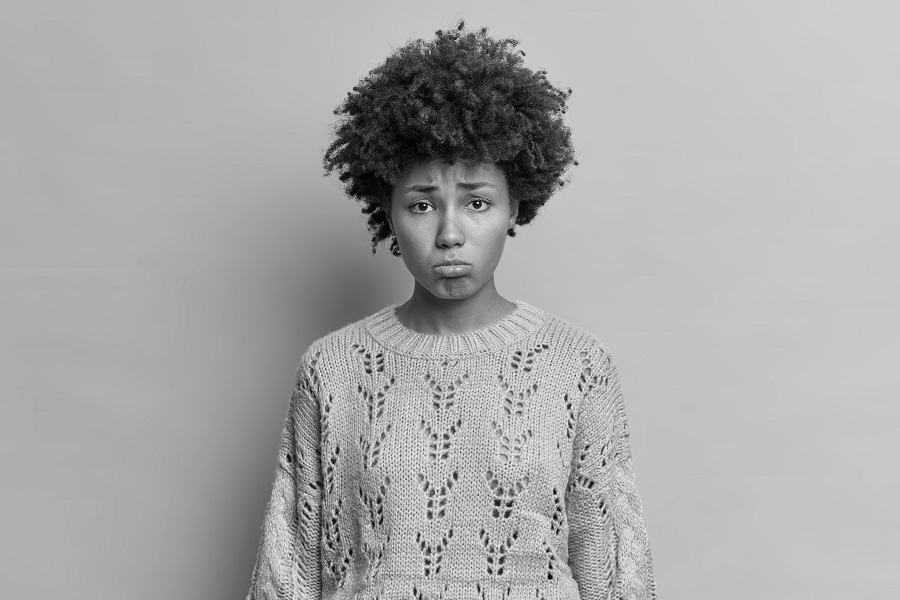

In [ ]:
# Convertendo a imagem em escala de cinza
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

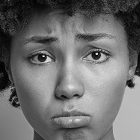

In [ ]:
# Especificação da região de interesse, conforme a face detecada.
# Retome a apresentação do array para especificar a regição de interesse. Ex: [381, 149, 140, 140]
# Na posição do pixel 149, some 140 e, também, à posição do pixel 381, some 140.
roi = cinza[149:149 + 140, 381:381 + 140]
cv2_imshow(roi)

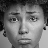

In [ ]:
# Redimensionando a ROI
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [ ]:
# Normalizando a ROI
roi = roi / 255

In [ ]:
# Transformando a imagem da ROI em array
roi = img_to_array(roi)

In [ ]:
# Expandindo as dimensões da ROI
roi = np.expand_dims(roi, axis = 0)

In [ ]:
# Forma da ROI: (quantidade de imagens, pixel x, pixel y, quantidade de canais)
roi.shape

(1, 48, 48, 1)

## Previsões

In [ ]:
# Levantando as predições do classificador de emoções
preds = classificador_emocoes.predict(roi)[0]
preds

1/1 [==============================] - 0s 46ms/step


array([0.11095095, 0.00544981, 0.23191437, 0.01137448, 0.35822752,
       0.02565149, 0.25643143], dtype=float32)

In [ ]:
# Quandidade de predições encontradas (referente a cada uma das 7 categorias de emoções)
len(preds)

7

In [ ]:
# Retorno da predição com maior probabilidade
emotion_probability = np.max(preds)
emotion_probability

0.35822752

In [ ]:
# Categoria da máxima predição
preds.argmax()

4

In [ ]:
# Demonstrando a categoria na classe correspondente
label = expressoes[preds.argmax()]
label

'Triste'

## Resultados

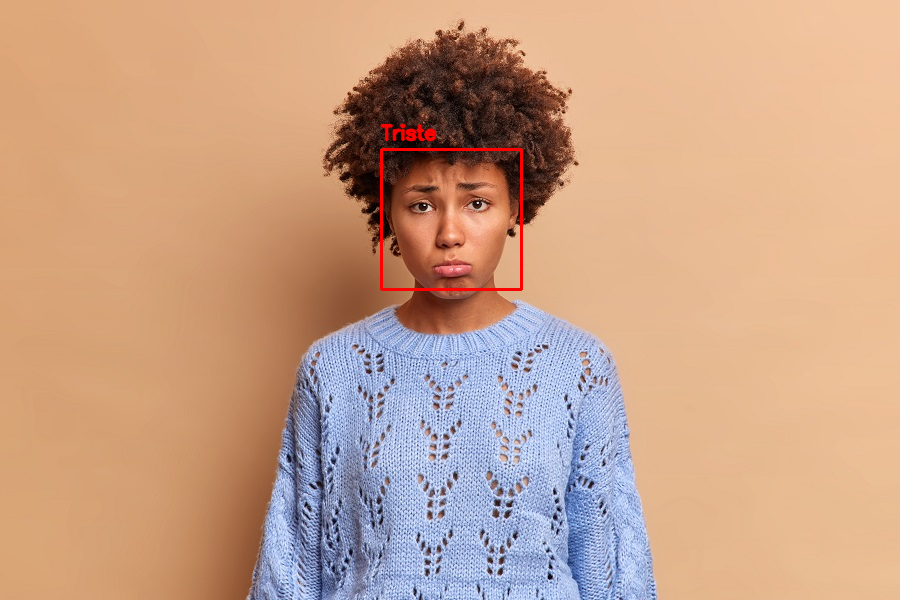

In [ ]:
# Escrevendo a emoção na imagem original
# Desenhando um retângulo na face encontrada
cv2.putText(original, label, (381, 149 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (381, 149), (381 + 140, 149 + 140), (0, 0, 255), 2)
cv2_imshow(original)

In [ ]:
probabilidades = np.ones((250,300,3), dtype= 'uint8') * 255 #inteiro

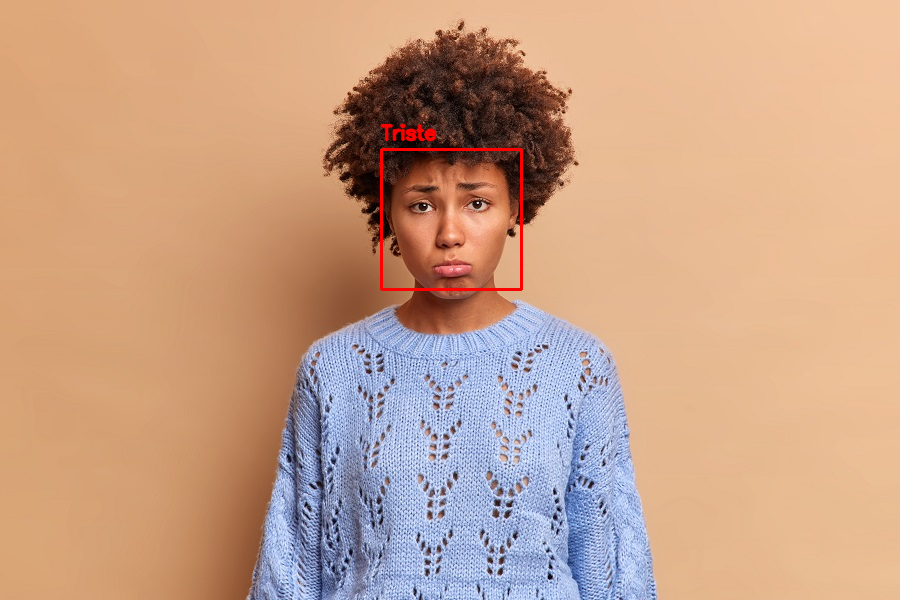

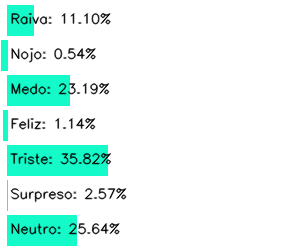

In [ ]:
# Demonstrando as probabilidades das categorias em barras
cv2_imshow(original)
if len(faces) == 2:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    #print(i, emotion, prob)
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(probabilidades)